# Example

---

```{admonition} Revised
22 Apr 2023
```
```{contents}
```

---

## Programming Environment

In [2]:
from fractions import Fraction

import numpy as np
import sympy as sp
from   sympy import init_printing,latex,solve,symbols
from   sympy.matrices import diag,eye,GramSchmidt,ones,Matrix,zeros
from   sympy.solvers.inequalities import reduce_inequalities

x1,x2,x3,x4=symbols('x1 x2 x3 x4')
init_printing(use_latex=True)

import matplotlib        as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot');
plt.rcParams.update({'text.usetex' : True});
%matplotlib inline

from IPython.display import display, Math

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'   :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''           :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'     :<{pad}}: {s.version}")
print(f"{''           :<{pad}}: {s.version_info}")
print(f"{''           :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib' :<{pad}}: {mpl.__version__}")
print(f"{'NumPy'      :<{pad}}: {np .__version__}")
print(f"{'SymPy'      :<{pad}}: {sp .__version__}")

def unitVector (vec : np.ndarray) -> np.ndarray:
  return vec/np.sqrt((vec[0]**2+vec[1]**2))

EXECUTED            : 2023-04-22 20:11:31.078847

Platform            : 13.3.1 | Darwin | 22.4.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
NumPy               : 1.24.1
SymPy               : 1.11.1


---

## LP

$
\begin{aligned}
\max z(\mathbf{x})&=-2x_1-x_2+2
\\
g_1(\mathbf{x})&=3x_1-7x_2\ge12=b_1
\\
g_2(\mathbf{x})&=-2x_1+5x_2\ge-20=b_2
\\
g_3(\mathbf{x})&=x_1+3x_2\le-3=b_3
\\
g_4(\mathbf{x})&=-4x_1-x_2\le8=b_4
\\
\mathbf{x}&\ge\mathbf{0}
\end{aligned}
\begin{aligned}
\max z(\mathbf{x})&=-2x_1-x_2+2
\\
g_1(\mathbf{x})&=-3x_1+7x_2\le-12=b_1
\\
g_2(\mathbf{x})&=2x_1-5x_2\le20=b_2
\\
g_3(\mathbf{x})&=x_1+3x_2\le-3=b_3
\\
g_4(\mathbf{x})&=-4x_1-x_2\le8=b_4
\\
\mathbf{x}&\ge\mathbf{0}
\end{aligned}
$

---

## Gradients and directions

$
\begin{aligned}
\nabla z&=\langle-2,-1\rangle
\\
\nabla g_1&=\langle-3,7\rangle
&&\langle-2,-1\rangle\cdot\langle7,3\rangle
&&\lt0
&&\implies\langle-7,-3\rangle
\\
\nabla g_2&=\langle2,-5\rangle
&&\langle-2,-1\rangle\cdot\langle-5,-2\rangle
&&\gt0
&&\implies\langle-5,-2\rangle
\\
\nabla g_3&=\langle1,3\rangle
&&\langle-2,-1\rangle\cdot\langle3,-1\rangle
&&\lt0
&&\implies\langle-3,1\rangle
\\
\nabla g_4&=\langle-4,-1\rangle
&&\langle-2,-1\rangle\cdot\langle-1,4\rangle
&&\lt0
&&\implies\langle1,-4\rangle
\end{aligned}
$

---

## Non Negativity

<div class="full-width">

$
\begin{aligned}
\max z(\mathbf{x})&=-2x_1-x_2+2
\\
g_1(\mathbf{x})&=-3x_1+7x_2\le-12=b_1
\\
g_2(\mathbf{x})&=2x_1-5x_2\le20=b_2
\\
g_3(\mathbf{x})&=x_1+3x_2\le-3=b_3
\\
g_4(\mathbf{x})&=-4x_1-x_2\le8=b_4
\\
\mathbf{x}&\ge\mathbf{0}
\end{aligned}
\begin{aligned}
\max z(\mathbf{x})&=-2u_1+2u_2-u_3+u_4+2
\\
g_1(\mathbf{x})&=-3u_1+3u_2+7u_3-7u_4\le-12=b_1
\\
g_2(\mathbf{x})&=2u_1-2u_2-5u_3+5u_4\le20=b_2
\\
g_3(\mathbf{x})&=u_1-u_2+3u_3-3u_4\le-3=b_3
\\
g_4(\mathbf{x})&=-4u_1+4u_2-u_3+u_4\le8=b_4
\\
\mathbf{x}&\ge\mathbf{0}
\\
x_1&=u_1-u_2
\\
x_2&=u_3-u_4
\end{aligned}
$

</div>

---

## Matrix Form

$
\text{LP}=
\begin{aligned}
\max z(\mathbf{x})&=\mathbf{cx}+d
\\
\mathbf{Ax}&\le\mathbf{b}
\\
\mathbf{x}&\ge\mathbf{0}
\end{aligned}
$

$
\begin{aligned}
z=\mathbf{cx}+d
&\iff
z=
\begin{bmatrix}
-2 & 2 & -1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
\end{bmatrix}
+2
\\
\mathbf{Ax}\le\mathbf{b}
&\iff
\begin{bmatrix}
-3 &  3 &  7 & -7 \\
 2 & -2 & -5 &  5 \\
 1 & -1 &  3 & -3 \\
-4 &  4 & -1 &  1 \\
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
\end{bmatrix}
\le
\begin{bmatrix}
-12 \\
 20 \\
 -3 \\
  8 \\
\end{bmatrix}
\end{aligned}
$

---

## Dual LP

$
\boxed{
\text{LP}=
\begin{aligned}
\max z(\mathbf{x})&=\mathbf{cx}+d
\\
\mathbf{Ax}&\le\mathbf{b}
\\
\mathbf{x}&\ge\mathbf{0}
\end{aligned}
\overset{\text{dual to}}{\iff}
\begin{aligned}
\min w(\mathbf{y})&=\mathbf{yb}+d
\\
\mathbf{yA}&\ge\mathbf{c}
\\
\mathbf{y}&\ge\mathbf{0}
\end{aligned}
=\text{LP}^*
}
$

$
\text{LP}=
\begin{aligned}
\max z(\mathbf{x})&=-2u_1+2u_2-u_3+u_4+2
\\
g_1(\mathbf{x})&=-3u_1+3u_2+7u_3-7u_4\le-12=b_1
\\
g_2(\mathbf{x})&=2u_1-2u_2-5u_3+5u_4\le20=b_2
\\
g_3(\mathbf{x})&=u_1-u_2+3u_3-3u_4\le-3=b_3
\\
g_4(\mathbf{x})&=-4u_1+4u_2-u_3+u_4\le8=b_4
\\
\mathbf{x}&\ge\mathbf{0}
\\
x_1&=u_1-u_2
\\
x_2&=u_3-u_4
\end{aligned}
\overset{\text{dual to}}{\iff}
\begin{aligned}
\min w(\mathbf{y})&=-12y_1+20y_2-3y_3+8y_4+2
\\
h_1(\mathbf{y})&=-3y_1+2y_2+y_3-4y_4\ge-2=c_1
\\
h_2(\mathbf{y})&=3y_1-2y_2-y_3+4y_4\ge2=c_2
\\
h_3(\mathbf{y})&=7y_1-5y_2+3y_3-y_4\ge-1=c_3
\\
h_4(\mathbf{y})&=-7y_1+5y_2-3y_3+y_4\ge1=c_4
\\
\mathbf{y}&\ge\mathbf{0}
\end{aligned}
=\text{LP}^*
$

$
\begin{aligned}
w=\mathbf{yb}+d
&\iff
w=
\begin{bmatrix}
y_1 & y_2 & y_3 & y_4 \\
\end{bmatrix}
\begin{bmatrix}
-12 \\ 20 \\ -3 \\ 8 \\
\end{bmatrix}
+2
\\
\mathbf{yA}\ge\mathbf{c}
&\iff
\begin{bmatrix}
y_1 & y_2 & y_3 & y_4 \\
\end{bmatrix}
\begin{bmatrix}
-3 &  3 &  7 & -7 \\
 2 & -2 & -5 &  5 \\
 1 & -1 &  3 & -3 \\
-4 &  4 & -1 &  1 \\
\end{bmatrix}
\ge
\begin{bmatrix}
-2 & 2 & -1 & 1 \\
\end{bmatrix}
\end{aligned}
$

---

## Optimal Solution

$
\boxed{
\begin{aligned}
z^*
=\min\mathbf{cx}+d
=\mathbf{(yA)x}+d
=\mathbf{y(Ax)}+d
=\max\mathbf{yb}+d
=w^*
\end{aligned}
}
$

<div class="full-width">

$
\begin{aligned}
z^*=
\begin{bmatrix}
-2 & 2 & -1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
\end{bmatrix}
+2
=\begin{bmatrix}
y_1 & y_2 & y_3 & y_4 \\
\end{bmatrix}
\begin{bmatrix}
-3 &  3 &  7 & -7 \\
 2 & -2 & -5 &  5 \\
 1 & -1 &  3 & -3 \\
-4 &  4 & -1 &  1 \\
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
\end{bmatrix}
+2
=\begin{bmatrix}
y_1 & y_2 & y_3 & y_4 \\
\end{bmatrix}
\begin{bmatrix}
-12 \\
 20 \\
 -3 \\
  8 \\
\end{bmatrix}
+2
=w^*
\end{aligned}
$

</div>

<div class="full-width">

$
\begin{aligned}
z^*
&=\begin{bmatrix}
-2 & 2 & -1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
\end{bmatrix}
+2
\\
&=-2u_1+2u_2-u_3+u_4+2
\\
&=\begin{bmatrix}
-3y_1+2y_2+ y_3-4y_4 &
 3y_1-2y_2- y_3+4y_4 &
 7y_1-5y_2+3y_3- y_4 &
-7y_1+5y_2-3y_3+ y_4
\end{bmatrix}
\begin{bmatrix}
u_1 \\ u_2 \\ u_3 \\ u_4 \\
\end{bmatrix}
+2
\\
&=
[-3y_1u_1+2y_2u_1+ y_3u_1-4y_4u_1] +
[ 3y_1u_2-2y_2u_2- y_3u_2+4y_4u_2] +
[ 7y_1u_3-5y_2u_3+3y_3u_3- y_4u_3] +
[-7y_1u_4+5y_2u_4-3y_3u_4+ y_4u_4] + 2
\\
&=
[-3y_1u_1+3y_1u_2+7y_1u_3-7y_1u_4] +
[ 2y_2u_1-2y_2u_2-5y_2u_3+5y_2u_4] +
[  y_3u_1- y_3u_2+3y_3u_3-3y_3u_4] +
[-4y_4u_1+4y_4u_2- y_4u_3+ y_4u_4] + 2
\\
&=\begin{bmatrix}
y_1 & y_2 & y_3 & y_4 \\
\end{bmatrix}
\begin{bmatrix}
-3u_1+3u_2+7u_3-7u_4 \\
 2u_1-2u_2-5u_3+5u_4 \\
  u_1- u_2+3u_3-3u_4 \\
-4u_1+4u_2- u_3+ u_4 \\
\end{bmatrix}
+2
\\
&=\begin{bmatrix}
y_1 & y_2 & y_3 & y_4 \\
\end{bmatrix}
\begin{bmatrix}
-12 \\
 20 \\
 -3 \\
  8 \\
\end{bmatrix}
+2
\\
&=-12y_1+20y_2-3y_3+8y_4+2
\\
&=w^*
\end{aligned}
$

</div>

---

## Graphical

 17
 12
  5
  2


'LINES'

'g1'

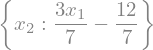

'g2'

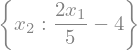

'g3'

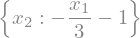

'g4'

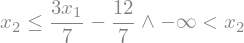

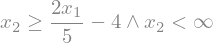

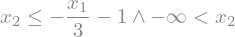

'INTERSECTIONS'

'g1=g2'

'g1=g3'

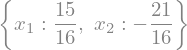

'g1=g4'

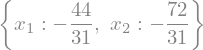

'g2=g3'

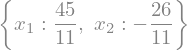

'g2=g4'

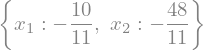

'g3=g4'

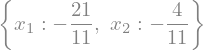

'g1[6,x2]'

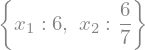

'g1[0,x2]'

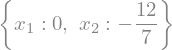

'g2[6,x2]'

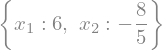

'g3[6,x2]'

'g4[0, 6]'

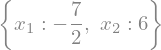

In [8]:
d =  2
b1=-12
b2= 20
b3= -3
b4=  8

z =-2*x1-1*x2+d
g1=-3*x1+7*x2-b1
g2= 2*x1-5*x2-b2
g3= 1*x1+3*x2-b3
g4=-4*x1-1*x2-b4

# GRADIENTS & DIRECTIONS
delz =np.array([-2,-1])
delg1=np.array([-3, 7]); dg1=np.array([-7,-3])
delg2=np.array([ 2,-5]); dg2=np.array([-5,-2])
delg3=np.array([ 1, 3]); dg3=np.array([-3, 1])
delg4=np.array([-4,-1]); dg4=np.array([ 1,-4])

# UNIT DIRECTION VECTORS
udg1=dg1/np.sqrt(dg1[0]**2+dg1[1]**2)
udg2=dg2/np.sqrt(dg2[0]**2+dg2[1]**2)
udg3=dg3/np.sqrt(dg3[0]**2+dg3[1]**2)
udg4=dg4/np.sqrt(dg4[0]**2+dg4[1]**2)

print(f"{delz.dot(dg1):>3}")
print(f"{delz.dot(dg2):>3}")
print(f"{delz.dot(dg3):>3}")
print(f"{delz.dot(dg4):>3}")

# LINES & INTERSECTIONS
display(
'LINES',
'g1',solve(g1,x2,dict=True)[0],
'g2',solve(g2,x2,dict=True)[0],
'g3',solve(g3,x2,dict=True)[0],
'g4',solve(g4,x2,dict=True)[0],
)

display(
reduce_inequalities(g1<=0,[x2]),
reduce_inequalities(g2<=0,[x2]),
reduce_inequalities(g3<=0,[x2]),
reduce_inequalities(g4<=0,[x2]),
)

display(
'INTERSECTIONS',
'g1=g2',   solve([g1,g2],  [x1,x2],dict=True)[0],
'g1=g3',   solve([g1,g3],  [x1,x2],dict=True)[0],
'g1=g4',   solve([g1,g4],  [x1,x2],dict=True)[0],
'g2=g3',   solve([g2,g3],  [x1,x2],dict=True)[0],
'g2=g4',   solve([g2,g4],  [x1,x2],dict=True)[0],
'g3=g4',   solve([g3,g4],  [x1,x2],dict=True)[0],
'g1[6,x2]',solve([g1,x1-6],[x1,x2],dict=True)[0],
'g1[0,x2]',solve([g1,x1  ],[x1,x2],dict=True)[0],
'g2[6,x2]',solve([g2,x1-6],[x1,x2],dict=True)[0],
'g3[6,x2]',solve([g3,x1-6],[x1,x2],dict=True)[0],
'g4[0, 6]',solve([g4,x2-6],[x1,x2],dict=True)[0],
)

In [45]:
# zStar

print(z.subs([
  (x1,-(10/11)),
  (x2,-(48/11)),
]))

print(Fraction(float(z.subs([
  (x1,-(10/11)),
  (x2,-(48/11)),
]))).limit_denominator(100))

8.18181818181818
90/11


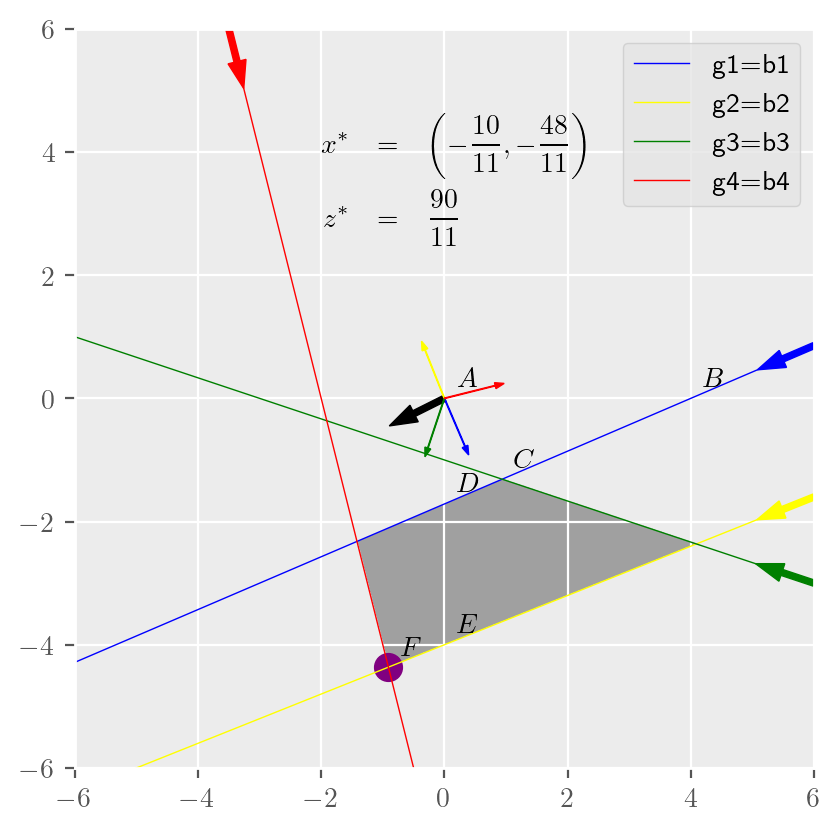

In [42]:
s =6
x =np.linspace(-s,s,1001)

# LINES
y1= (3/7)*x-(12/7)
y2= (2/5)*x-( 4/1)
y3=-(1/3)*x-( 1/1)
y4=-(4/1)*x-( 8/1)

fig=plt.figure(dpi=200);
ax =plt.subplot();
ax.set_aspect(1);

# LINES
ax.plot(x,y1,label='g1=b1',linewidth=0.5,color='blue');
ax.plot(x,y2,label='g2=b2',linewidth=0.5,color='yellow');
ax.plot(x,y3,label='g3=b3',linewidth=0.5,color='green');
ax.plot(x,y4,label='g4=b4',linewidth=0.5,color='red');

# delz
ax.arrow(0,0,*unitVector(delz),width=0.1,length_includes_head=True,color='black');

# FEASIBLE SIDES <=
ax.arrow(0,0,*unitVector(-delg1),color='blue',  width=0.01,head_width=0.1,length_includes_head=True);
ax.arrow(0,0,*unitVector(-delg2),color='yellow',width=0.01,head_width=0.1,length_includes_head=True);
ax.arrow(0,0,*unitVector(-delg3),color='green', width=0.01,head_width=0.1,length_includes_head=True);
ax.arrow(0,0,*unitVector(-delg4),color='red',   width=0.01,head_width=0.1,length_includes_head=True);

# DIRECTIONS
ax.arrow( (6/1), (6/7),udg1[0],udg1[1],width=0.1,length_includes_head=True,color='blue');
ax.arrow( (6/1),-(8/5),udg2[0],udg2[1],width=0.1,length_includes_head=True,color='yellow');
ax.arrow( (6/1),-(3/1),udg3[0],udg3[1],width=0.1,length_includes_head=True,color='green');
ax.arrow(-(7/2), (6/1),udg4[0],udg4[1],width=0.1,length_includes_head=True,color='red');

fx,fy=np.meshgrid(x,x)
plt.imshow(
  (
      ( fy<= (3/7)*fx-(12/7))
    & (-fy<=-(2/5)*fx+( 4/1))
    & ( fy<=-(1/3)*fx-( 1/1))
    & (-fy<= (4/1)*fx+( 8/1))
  ).astype(int),
  extent=(fx.min(),fx.max(),fy.min(),fy.max()),
  origin='lower',
  cmap  ='Greys',
  alpha =0.3,
);

ax.set_xlim(-s,s);
ax.set_ylim(-s,s);
ax.legend();

# xStar
ax.scatter(-(10/11),-(48/11),s=1e2,color='purple');

xStar=(
  r'\begin{eqnarray*}'
  r'x^*&=&\left(-\frac{10}{11},-\frac{48}{11}\right)'
  r'\\'
  r'z^*&=&\frac{90}{11}'
  r'\end{eqnarray*}'
)
ax.text(-2,4,xStar,fontsize=10);

# SIMPLEX
dx,dy=0.2,0.2
ax.annotate('$A$',(0+dx,0+dy));
ax.annotate('$B$',(4+dx,0+dy));
ax.annotate('$C$',( (15/16)+dx,-(21/16)+dy));
ax.annotate('$D$',( (    0)+dx,-(12/ 7)+dy));
ax.annotate('$E$',( (    0)+dx,-(    4)+dy));
ax.annotate('$F$',(-(10/11)+dx,-(48/11)+dy));

---

## Simplex Algorithm

In [9]:
def pivot (iStar,jStar,tab):
  nRows =tab.shape[0]-1
  nCols =tab.shape[1]-1
  newTab=tab[:,:]

  newTab[0,jStar]    =tab[iStar,nCols]
  newTab[iStar,nCols]=tab[0,jStar]
  newTab[iStar,0]    =-tab[nRows,jStar]
  newTab[nRows,jStar]=-tab[iStar,0]
  
  for i in range(1,nRows):
    for j in range(1,nCols):
      if   i==iStar and j==jStar:
        newTab[i,j]=1/tab[iStar,jStar]
      elif i==iStar and j!=jStar:
        newTab[i,j]=-tab[i,j]/tab[iStar,jStar]
      elif i!=iStar and j==jStar:
        newTab[i,j]= tab[i,j]/tab[iStar,jStar]
      elif i!=iStar and j!=jStar:
        newTab[i,j]= tab[i,j]-tab[iStar,j]*tab[i,jStar]/tab[iStar,jStar]
  return newTab

In [51]:
A = Matrix([
  [ 'c', 'u1', 'u2', 'u3','u4',  1, 'r'],
  ['y1',    3,   -3,   -7,   7,-12,'s1'],
  ['y2',   -2,    2,    5,  -5, 20,'s2'],
  ['y3',   -1,    1,   -3,   3, -3,'s3'],
  ['y4',    4,   -4,    1,  -1,  8,'s4'],
  [  -1,    2,   -2,    1,  -1, -2,'-z'],
  [ 'c','-v1', '-v2','-v3','-v4','w', 'r'],
])
B = pivot(1,1,A)
C = pivot(3,4,B)
D = pivot(1,4,C)
E = pivot(2,1,D)
F = pivot(4,2,E)

display(
  Math(fr'A = {latex(A)}\,\,\,\,\,x_1=x_2=0'),
  Math(fr'B = {latex(B)}\,\,\,\,\,x_2=s_1=0'),
  Math(fr'C = {latex(C)}\,\,\,\,\,s_1=s_3=0'),
  Math(fr'D = {latex(D)}\,\,\,\,\,x_1=s_1=0'),
  Math(fr'E = {latex(E)}\,\,\,\,\,x_1=s_2=0'),
  Math(fr'F = {latex(F)}\,\,\,\,\,s_2=s_4=0'),
)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---